# CS 513 Final Project
## Vaibhav Ganeriwala
### KNN 

In [131]:
# importing all libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [132]:
# read csv into a pandas dataframe
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [133]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [134]:
# rows and columns of dataset
rows = df.shape[0]
columnns = df.shape[1]
print(f"Rows: {rows}, Columns: {columnns}")

Rows: 253680, Columns: 22


In [135]:
# first 10 rows of dataset
df.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [136]:
# calculate missing and null values
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

as data is already clean no need to clean it further

In [137]:
# describe the dataset
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


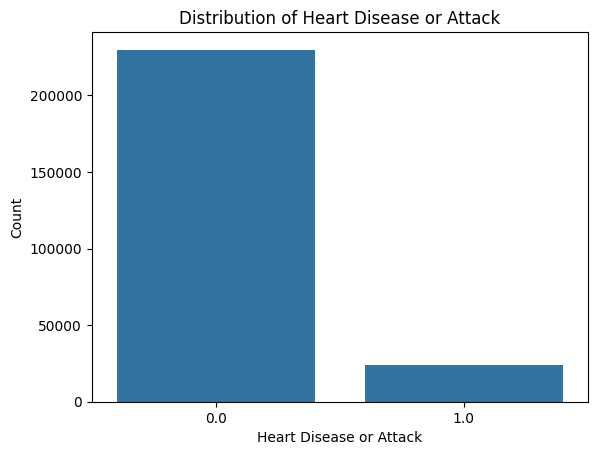

In [138]:
# countplot of heart disease
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title('Distribution of Heart Disease or Attack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.show()

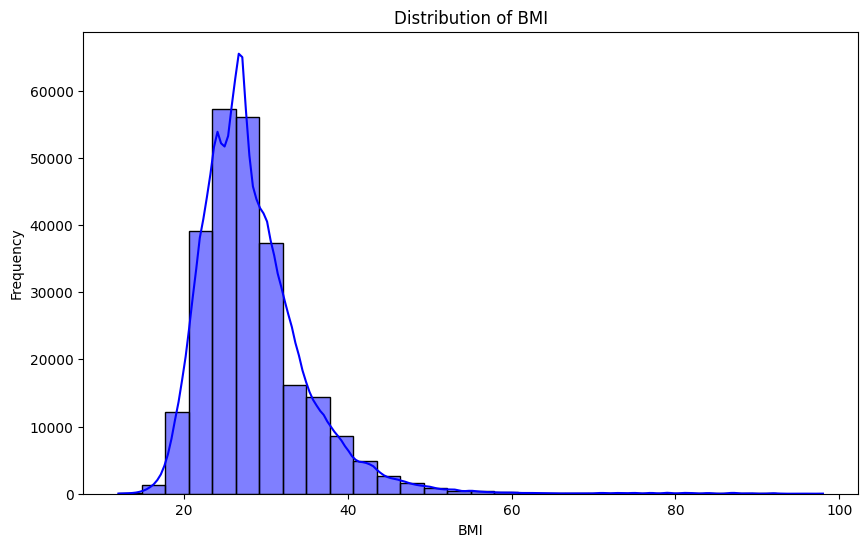

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='blue', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

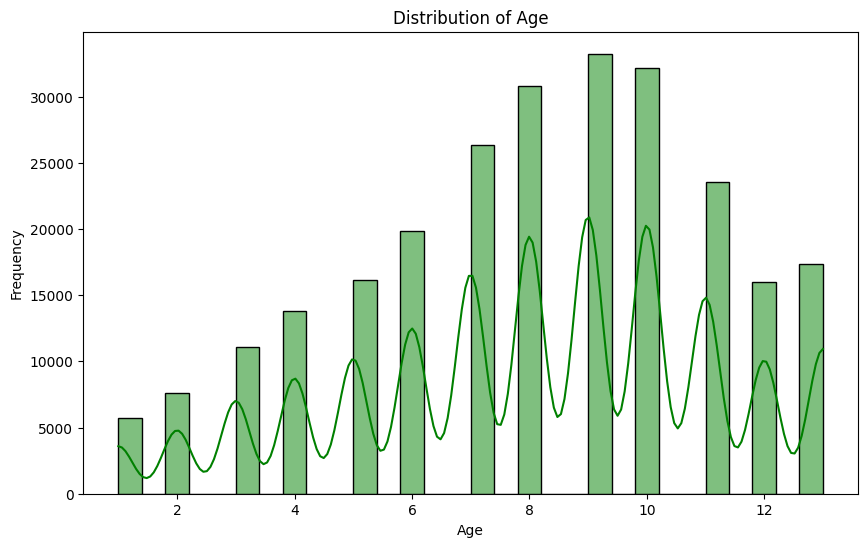

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='green', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

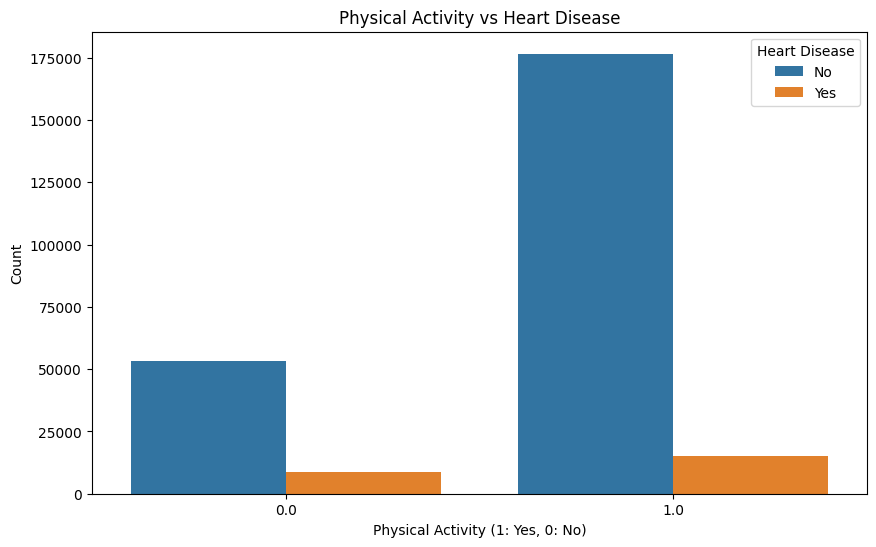

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=df)
plt.title('Physical Activity vs Heart Disease')
plt.xlabel('Physical Activity (1: Yes, 0: No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

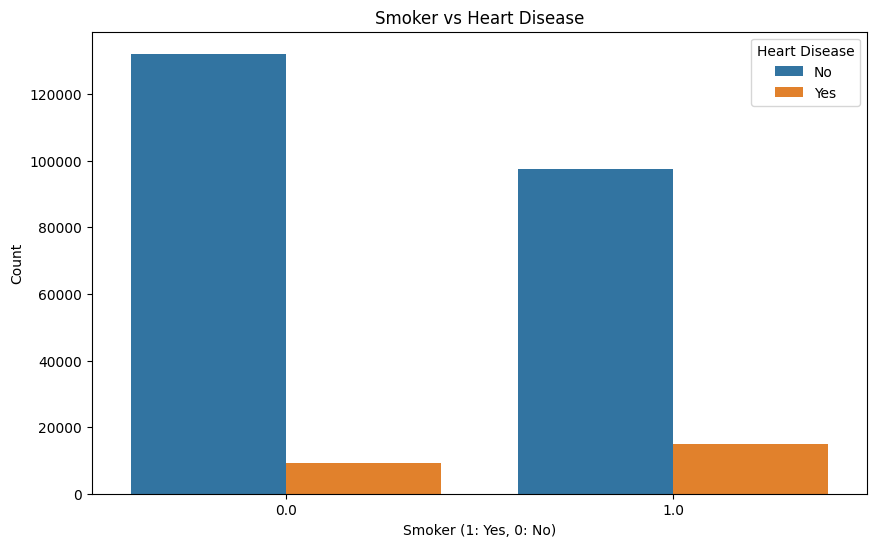

In [142]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=df)
plt.title('Smoker vs Heart Disease')
plt.xlabel('Smoker (1: Yes, 0: No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

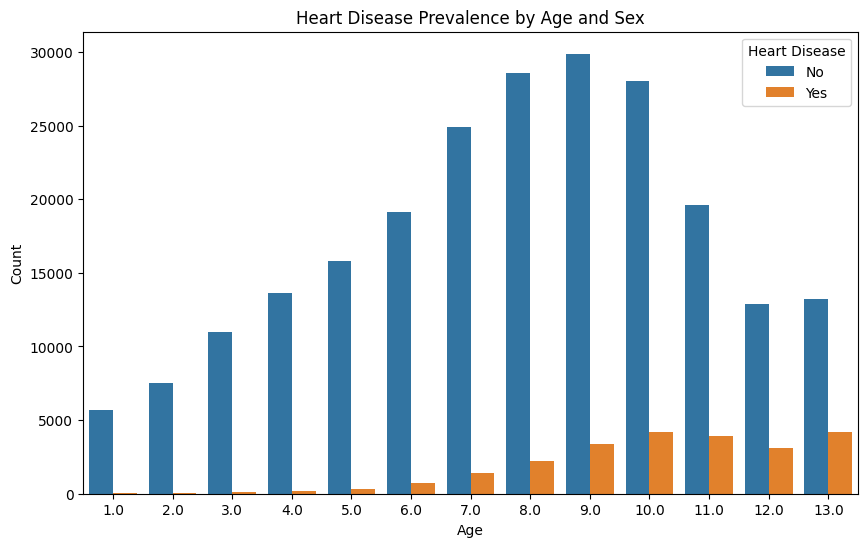

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=df, dodge=True)
plt.title('Heart Disease Prevalence by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

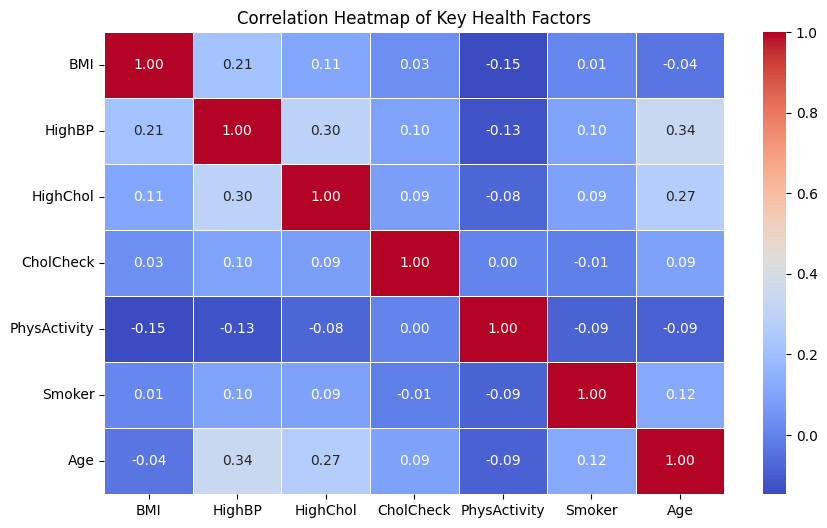

In [144]:
corr_data = df[['BMI', 'HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'Smoker', 'Age']]
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Health Factors')
plt.show()


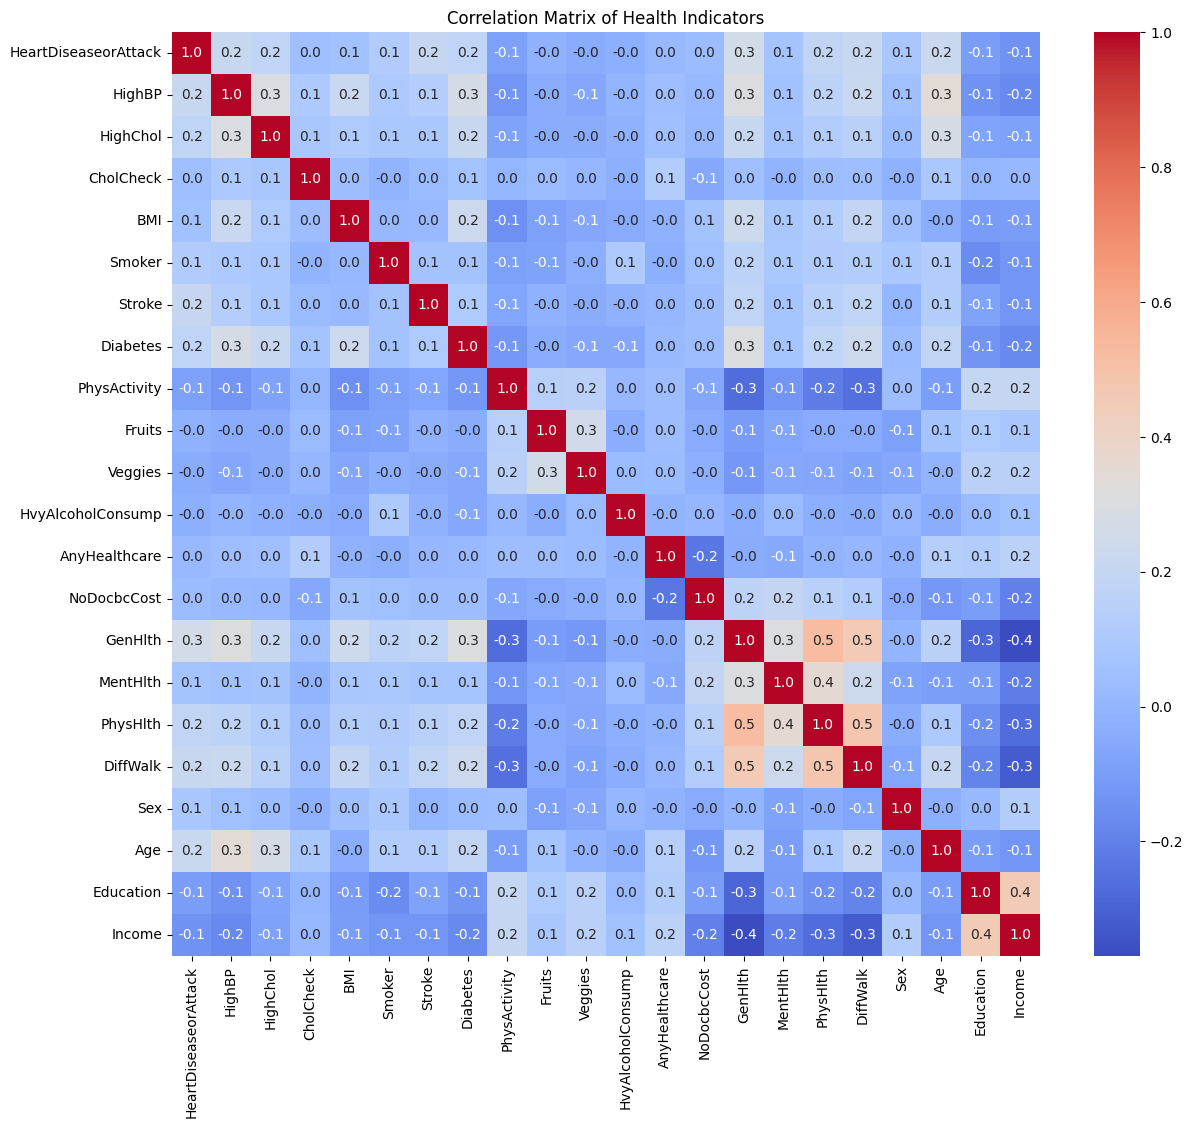

In [145]:
# correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix of Health Indicators')
plt.show()

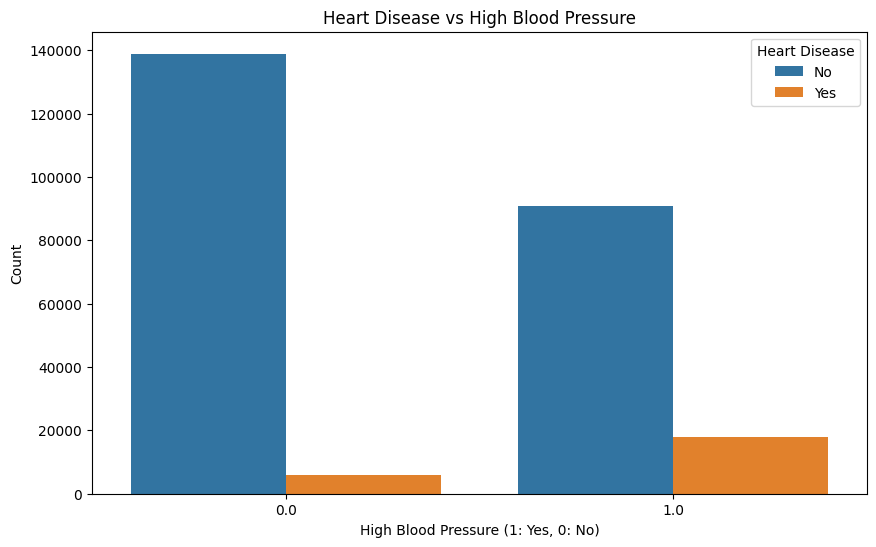

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease vs High Blood Pressure')
plt.xlabel('High Blood Pressure (1: Yes, 0: No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

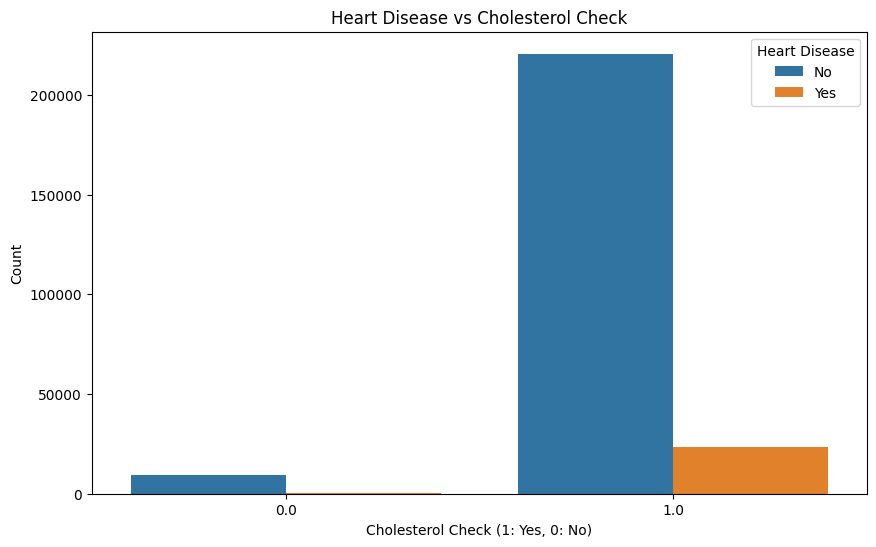

In [147]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CholCheck', hue='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease vs Cholesterol Check')
plt.xlabel('Cholesterol Check (1: Yes, 0: No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

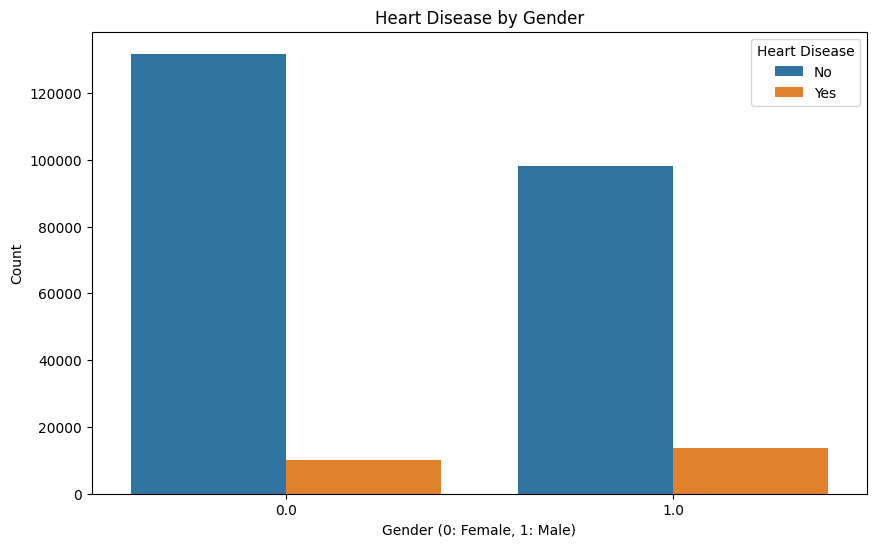

In [148]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

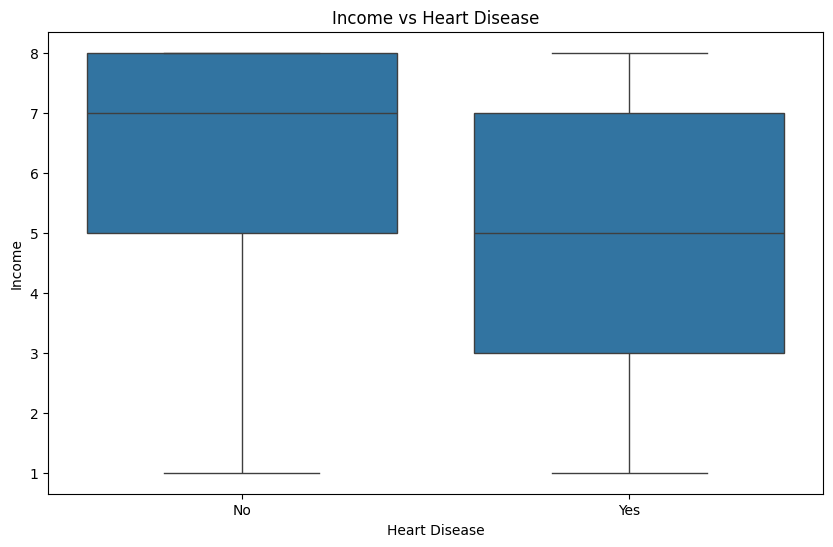

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='Income', data=df)
plt.title('Income vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

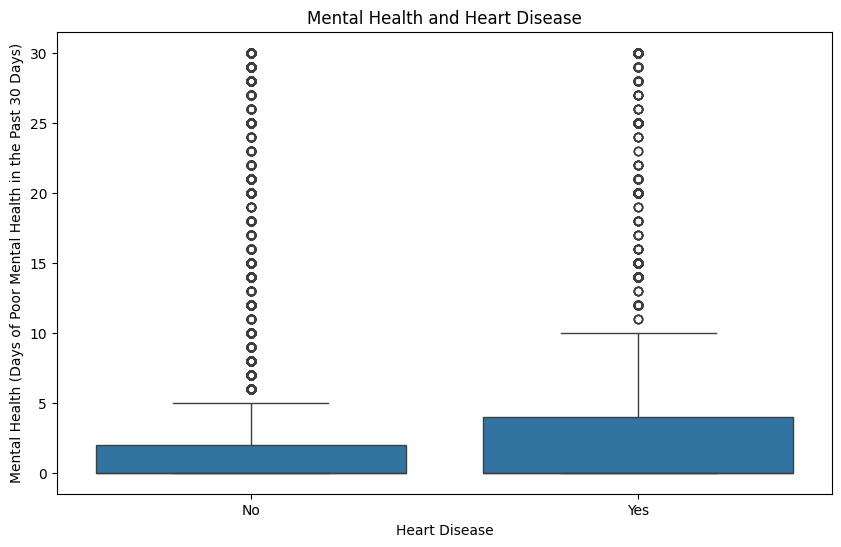

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='MentHlth', data=df)
plt.title('Mental Health and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health (Days of Poor Mental Health in the Past 30 Days)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

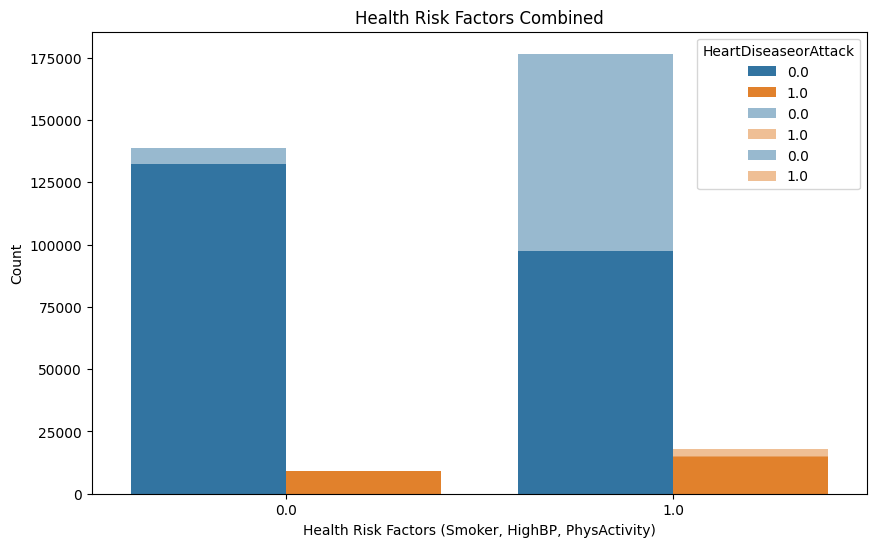

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=df)
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df, alpha=0.5)
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=df, alpha=0.5)
plt.title('Health Risk Factors Combined')
plt.xlabel('Health Risk Factors (Smoker, HighBP, PhysActivity)')
plt.ylabel('Count')
plt.show()

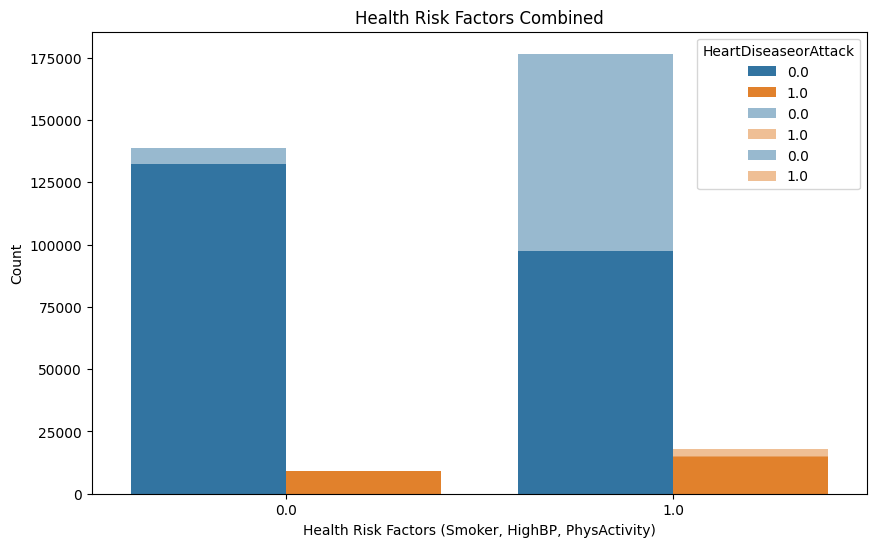

In [152]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=df)
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df, alpha=0.5)
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=df, alpha=0.5)
plt.title('Health Risk Factors Combined')
plt.xlabel('Health Risk Factors (Smoker, HighBP, PhysActivity)')
plt.ylabel('Count')
plt.show()

In [153]:
# prepare the data for training
X = df.drop(['HeartDiseaseorAttack'], axis=1)
y = df['HeartDiseaseorAttack']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             scoring='accuracy', verbose=1)

In [157]:
print("Best hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

Best hyperparameters found:
{'n_neighbors': 13}
Best cross-validated accuracy: 0.9040


In [158]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [159]:
print(f"\nTest set accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test set accuracy: 0.9052

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.46      0.11      0.17      7097

    accuracy                           0.91     76104
   macro avg       0.69      0.55      0.56     76104
weighted avg       0.87      0.91      0.88     76104



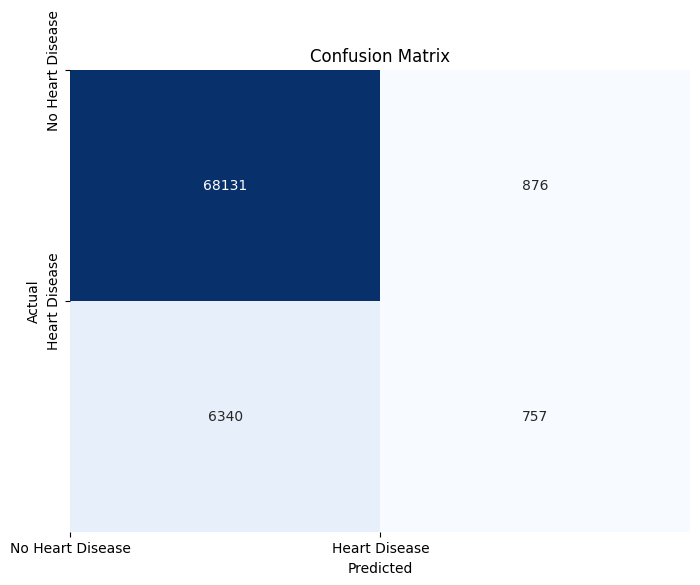

In [160]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()